# Clean daily visits data

In [1]:
%matplotlib inline
import pandas as pd

In [2]:
fname = 'Analytics All Web Site Data Audience Overview 20180101-20180918.csv'

In [3]:
date_range = fname.split()[-1].replace('.csv', '')

In [4]:
with open('daily-data.csv', 'w') as output:
    with open(fname) as f:
        for line in f:
            line = line.strip()
            if line.startswith("#") or not line:
                continue
            else:
                output.write(line + '\n')

In [5]:
!head "$fname"

# ----------------------------------------
# All Web Site Data
# Audience Overview
# 20180101-20180918
# ----------------------------------------

Day Index,Sessions
01/01/2018,214
02/01/2018,385
03/01/2018,436


In [6]:
!head daily-data.csv

Day Index,Sessions
01/01/2018,214
02/01/2018,385
03/01/2018,436
04/01/2018,481
05/01/2018,368
06/01/2018,255
07/01/2018,263
08/01/2018,521
09/01/2018,713


In [7]:
df = pd.read_csv("daily-data.csv", parse_dates=True, dayfirst=True,
                 infer_datetime_format=True, index_col='Day Index',
                 converters={'Sessions': lambda x: int(x.replace(',', ''))})

In [8]:
df.head()

,Sessions
Day Index,
2018-01-01,214
2018-01-02,385
2018-01-03,436
2018-01-04,481
2018-01-05,368


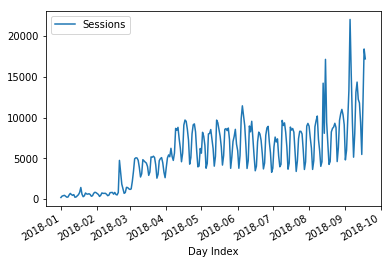

In [9]:
df.plot()

In [10]:
df.to_csv('visits-{}.csv'.format(date_range))